In [1]:
from statistics import mean,median,mode,stdev,variance
import numpy as np

In [2]:
sample = np.array([2,6,9,9,17,44])

# Summary Statistics

In [3]:
print("Mean : ",mean(sample))
print("Median :",median(sample))
print("Mode :",mode(sample))
print("Variance :",variance(sample))
print("StDev :",stdev(sample))
print("Range :",np.max(sample)-np.min(sample))
for val in [25,50,75]:
    print(str(val)+"th Percentile :",np.percentile(sample,val))
print("IQR :",np.percentile(sample,75)-np.percentile(sample,25))

Mean :  14
Median : 9.0
Mode : 9
Variance : 233
StDev : 15.264337522473747
Range : 42
25th Percentile : 6.75
50th Percentile : 9.0
75th Percentile : 15.0
IQR : 8.25


# Paired T-Test Simple Example

In [4]:
# Example of the Paired Student's t-test
from scipy.stats import ttest_rel
data1 = [0.873, 2.817, 0.121, 0.945, 0.055, 1.436, 0.360, 1.478, 1.637, 1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = ttest_rel(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=3.543, p=0.006
Probably different distributions


# Chi-Square Test

In [5]:
from scipy.stats import chi2_contingency
import pandas as pd
df = pd.read_csv("//Users//mayurimukherjee//Desktop//2021 Learning//Hypothesis Testing//Birthweight_reduced_kg_R.csv")
df.head()

,ID,Length,Birthweight,Headcirc,Gestation,smoker,mage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35
0,1360,56,4.55,34,44,0,20,0,162,57,23,10,35,179,0,0
1,1016,53,4.32,36,40,0,19,0,171,62,19,12,0,183,0,0
2,462,58,4.10,39,41,0,35,0,172,58,31,16,25,185,0,1
3,1187,53,4.07,38,44,0,20,0,174,68,26,14,25,189,0,0
4,553,54,3.94,37,42,0,24,0,175,66,30,12,0,184,0,0


In [6]:
contigency_pct = pd.crosstab(df['smoker'], df['lowbwt'])
contigency_pct
c, p, dof, expected = chi2_contingency(contigency_pct)
print("p-value is : ",p)
if p >= 0.05:
    print('Accept Null')
else:
    print('Reject Null')

p-value is :  0.23082094094618558
Accept Null


# One-way ANOVA (F-Test)

In [7]:
import scipy.stats as stats
df1 = df[df['smoker']==1]
df2 = df[df['smoker']==0]
one_way_anova = stats.f_oneway(df1['Birthweight'],df2['Birthweight'])
print("p-value is : ",one_way_anova[1])
pvalue = one_way_anova[1]
if (pvalue) >= 0.05:
    print('Accept Null')
else:
    print('Reject Null')

p-value is :  0.04269624654559394
Reject Null


# Paired T-Test 

In [8]:
stat, p = stats.ttest_ind(df1['Birthweight'], df2['Birthweight'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Accept Null')
else:
    print('Reject Null')

stat=-2.093, p=0.043
Reject Null


# Using Kaggle Dataset for EDA, Summary Stats & Hypothesis Testing

In [9]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.display.float_format = '{:.2f}'.format

In [10]:
df = pd.read_csv('//Users//mayurimukherjee//Desktop//2021 Learning//Hypothesis Testing//data.csv',index_col='Id')
df = df.drop(['Unnamed: 0'],axis=1)
df.head()

,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,84,1437,0,0,0.00,1403,squad-fpp,31,29,-1,0,0.00,0,0.00,0,0,151.30,1,1525,0.07
43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,57,1225,0,0,0.00,1971,squad-fpp,30,30,-1,0,0.00,0,0.00,0,0,1918.00,7,1516,0.59
9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,50,0,0,0,0.00,1741,solo-fpp,96,89,1516,0,4088.00,0,0.00,0,0,820.00,7,0,0.81
b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,56,1286,0,0,0.00,1738,squad-fpp,28,27,-1,1,0.00,0,0.00,0,0,38.81,0,1515,0.56
d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,31,0,1,1,7.74,2193,solo,99,95,1482,0,918.40,0,0.00,0,0,1721.00,5,0,0.64


In [11]:
print(df.shape)
print(df.dtypes)

(1111742, 28)
groupId             object
matchId             object
assists              int64
boosts               int64
damageDealt        float64
DBNOs                int64
headshotKills        int64
heals                int64
killPlace            int64
killPoints           int64
kills                int64
killStreaks          int64
longestKill        float64
matchDuration        int64
matchType           object
maxPlace             int64
numGroups            int64
rankPoints           int64
revives              int64
rideDistance       float64
roadKills            int64
swimDistance       float64
teamKills            int64
vehicleDestroys      int64
walkDistance       float64
weaponsAcquired      int64
winPoints            int64
winPlacePerc       float64
dtype: object


## Replace Null Values

In [12]:
df.isnull().sum()

groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [13]:
df['winPlacePerc'] = df['winPlacePerc'].fillna(0)

In [14]:
df.isnull().sum()

groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

## Identify Numeric & Categorical variables

In [15]:
df_numeric = df.select_dtypes(include=np.number).columns.tolist()
df_categorical = df.select_dtypes(exclude=np.number).columns.tolist()
df[df_numeric].head(2)

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
Id,,,,,,,,,,,,,,,,,,,,,,,,,
a3e3cea9f2e314,0,0,25.93,0,0,0,84,1437,0,0,0.00,1403,31,29,-1,0,0.00,0,0.00,0,0,151.30,1,1525,0.07
43e4be7ad72cc7,0,0,36.71,0,0,0,57,1225,0,0,0.00,1971,30,30,-1,0,0.00,0,0.00,0,0,1918.00,7,1516,0.59


In [16]:
df[df_categorical].head(2)

,groupId,matchId,matchType
Id,,,
a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,squad-fpp
43e4be7ad72cc7,521836de101ee8,b65de9055327e0,squad-fpp


## Summary Stats

In [17]:
df['matchType'].value_counts()

squad-fpp           438781
duo-fpp             249927
squad               156573
solo-fpp            133854
duo                  78039
solo                 45679
normal-squad-fpp      4286
crashfpp              1581
normal-duo-fpp        1400
flaretpp               633
normal-solo-fpp        465
flarefpp               180
normal-squad           135
crashtpp                86
normal-solo             75
normal-duo              48
Name: matchType, dtype: int64

In [18]:
df[df_numeric].describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,1111742.00,1111742.00,1111742.00,1111742.00,1111742.00,1111742.00,1111742.00,1111742.00,1111742.00,1111742.00,1111742.00,1111742.00,1111742.00,1111742.00,1111742.00,1111742.00,1111742.00,1111742.00,1111742.00,1111742.00,1111742.00,1111742.00,1111742.00,1111742.00,1111742.00
mean,0.23,1.11,130.74,0.66,0.23,1.37,47.60,504.43,0.93,0.54,23.00,1579.35,44.51,43.01,892.79,0.16,604.21,0.00,4.55,0.02,0.01,1153.28,3.66,605.71,0.47
std,0.59,1.72,171.18,1.15,0.60,2.68,27.47,627.40,1.56,0.71,51.07,258.93,23.82,23.28,736.64,0.47,1495.95,0.07,30.62,0.17,0.09,1182.79,2.46,739.51,0.31
min,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,9.00,1.00,1.00,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,24.00,0.00,0.00,0.00,0.00,1367.00,28.00,27.00,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,155.20,2.00,0.00,0.20
50%,0.00,0.00,84.11,0.00,0.00,0.00,47.00,0.00,0.00,0.00,0.00,1438.00,30.00,30.00,1444.00,0.00,0.00,0.00,0.00,0.00,0.00,684.10,3.00,0.00,0.46
75%,0.00,2.00,185.90,1.00,0.00,2.00,71.00,1171.00,1.00,1.00,21.33,1851.00,49.00,47.00,1500.00,0.00,0.08,0.00,0.00,0.00,0.00,1975.00,5.00,1495.00,0.74
max,17.00,24.00,5990.00,35.00,64.00,73.00,100.00,2170.00,72.00,20.00,1040.00,2237.00,100.00,100.00,5910.00,23.00,35400.00,14.00,2668.00,10.00,5.00,13960.00,177.00,2002.00,1.00


## Outlier Identification

In [19]:
perc_dist = pd.DataFrame(columns = ['Var', 'Min','1st Perc','25th Percentile','Median','75th Percentile','99th Percentile','Max'])
for column in df_numeric:
    mini = df[column].quantile(0)
    perc_1 = df[column].quantile(0.01)
    perc_25 = df[column].quantile(0.25)
    median = df[column].quantile(0.5)
    perc_75 = df[column].quantile(0.75)
    perc_99 = df[column].quantile(0.99)
    maxi = df[column].quantile(1)
    perc_dist = perc_dist.append({'Var':column,'Min':mini,'1st Perc':perc_1,'25th Percentile':perc_25,
                                  'Median':median,'75th Percentile':perc_75,'99th Percentile':perc_99,'Max':maxi},ignore_index=True)
    
perc_dist

,Var,Min,1st Perc,25th Percentile,Median,75th Percentile,99th Percentile,Max
0,assists,0.00,0.00,0.00,0.00,0.00,3.00,17.00
1,boosts,0.00,0.00,0.00,0.00,2.00,7.00,24.00
2,damageDealt,0.00,0.00,0.00,84.11,185.90,776.60,5990.00
3,DBNOs,0.00,0.00,0.00,0.00,1.00,5.00,35.00
4,headshotKills,0.00,0.00,0.00,0.00,0.00,3.00,64.00
5,heals,0.00,0.00,0.00,0.00,2.00,12.00,73.00
6,killPlace,1.00,1.00,24.00,47.00,71.00,96.00,100.00
7,killPoints,0.00,0.00,0.00,0.00,1171.00,1670.00,2170.00
8,kills,0.00,0.00,0.00,0.00,1.00,7.00,72.00
9,killStreaks,0.00,0.00,0.00,0.00,1.00,3.00,20.00


## Create Win Chance variable

In [20]:
df['win_high_chance']=np.where(df['winPlacePerc']>0.75,1,0)
df.head()

,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,win_high_chance
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,84,1437,0,0,0.00,1403,squad-fpp,31,29,-1,0,0.00,0,0.00,0,0,151.30,1,1525,0.07,0
43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,57,1225,0,0,0.00,1971,squad-fpp,30,30,-1,0,0.00,0,0.00,0,0,1918.00,7,1516,0.59,0
9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,50,0,0,0,0.00,1741,solo-fpp,96,89,1516,0,4088.00,0,0.00,0,0,820.00,7,0,0.81,1
b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,56,1286,0,0,0.00,1738,squad-fpp,28,27,-1,1,0.00,0,0.00,0,0,38.81,0,1515,0.56,0
d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,31,0,1,1,7.74,2193,solo,99,95,1482,0,918.40,0,0.00,0,0,1721.00,5,0,0.64,0


In [21]:
df['win_high_chance'].value_counts()

0    844939
1    266803
Name: win_high_chance, dtype: int64

In [22]:
df_win=df[df['win_high_chance']==1]
df_lose=df[df['win_high_chance']==0]

## Correlation Matrix

In [23]:
df.corr()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,win_high_chance
assists,1.00,0.31,0.41,0.30,0.20,0.23,-0.29,0.04,0.32,0.24,0.26,-0.02,-0.15,-0.15,-0.02,0.20,0.11,0.01,0.02,0.01,0.06,0.29,0.24,0.02,0.30,0.28
boosts,0.31,1.00,0.52,0.36,0.33,0.54,-0.55,0.01,0.50,0.40,0.42,0.07,-0.01,-0.01,0.02,0.25,0.33,0.03,0.11,0.01,0.09,0.64,0.41,-0.01,0.63,0.59
damageDealt,0.41,0.52,1.00,0.74,0.61,0.34,-0.68,0.05,0.89,0.70,0.56,-0.01,-0.04,-0.04,-0.00,0.26,0.14,0.05,0.04,0.02,0.08,0.40,0.35,0.02,0.44,0.39
DBNOs,0.30,0.36,0.74,1.00,0.47,0.27,-0.55,0.04,0.71,0.65,0.45,-0.01,-0.27,-0.27,-0.00,0.30,0.10,0.04,0.02,0.07,0.06,0.28,0.22,0.01,0.28,0.24
headshotKills,0.20,0.33,0.61,0.47,1.00,0.20,-0.47,0.02,0.67,0.51,0.44,-0.02,0.01,0.01,0.01,0.15,0.08,0.01,0.03,0.01,0.04,0.25,0.22,0.01,0.28,0.25
heals,0.23,0.54,0.34,0.27,0.20,1.00,-0.39,-0.00,0.31,0.27,0.26,0.11,-0.06,-0.06,0.02,0.24,0.30,0.02,0.08,0.04,0.06,0.43,0.31,-0.01,0.43,0.36
killPlace,-0.29,-0.55,-0.68,-0.55,-0.47,-0.39,1.00,-0.02,-0.73,-0.81,-0.54,-0.00,0.02,0.02,-0.01,-0.27,-0.24,-0.06,-0.09,-0.04,-0.07,-0.59,-0.49,-0.00,-0.72,-0.51
killPoints,0.04,0.01,0.05,0.04,0.02,-0.00,-0.02,1.00,0.04,0.04,0.01,-0.10,-0.04,-0.04,-0.98,0.01,-0.03,-0.00,-0.01,-0.04,-0.01,0.00,-0.00,0.98,0.01,0.01
kills,0.32,0.50,0.89,0.71,0.67,0.31,-0.73,0.04,1.00,0.80,0.60,-0.03,-0.01,-0.00,0.01,0.25,0.11,0.06,0.04,0.02,0.08,0.37,0.34,0.01,0.42,0.38
killStreaks,0.24,0.40,0.70,0.65,0.51,0.27,-0.81,0.04,0.80,1.00,0.51,-0.04,-0.04,-0.04,0.00,0.24,0.10,0.07,0.03,0.03,0.06,0.33,0.28,0.01,0.38,0.31


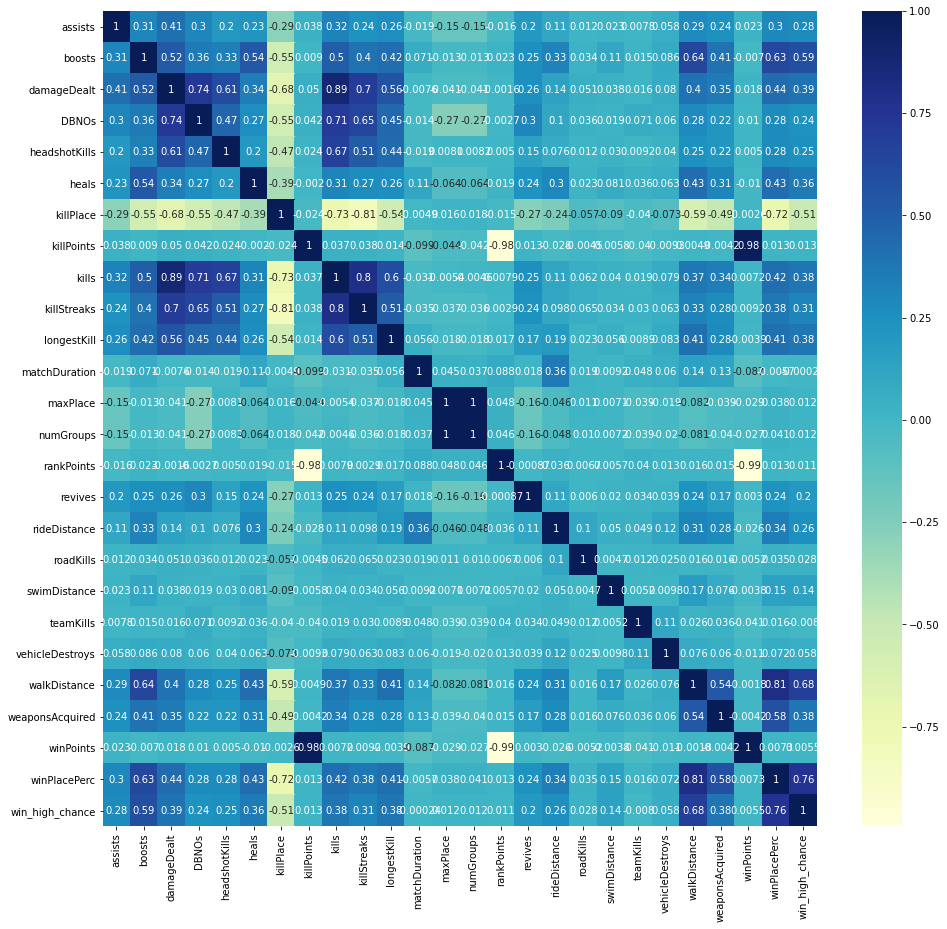

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = df.corr()
plt.figure(figsize = (16,15))
dataplot = sns.heatmap(corr, cmap="YlGnBu", annot=True)

## T-Test b/w Winner & Losers to see if Avg Kills & Avg Vehicle Destroys differ or not

In [25]:
stat, p = stats.ttest_ind(df_win['kills'], df_lose['kills'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Accept Null')
else:
    print('Reject Null')

stat=434.459, p=0.000
Reject Null


In [26]:
stat, p = stats.ttest_ind(df_win['vehicleDestroys'], df_lose['vehicleDestroys'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Accept Null')
else:
    print('Reject Null')

stat=60.940, p=0.000
Reject Null


## T-Test for all numeric variables b/w Winner & Losers

In [27]:
ttest_table = pd.DataFrame(columns = ['Var', 'p-value','Decision'])
for column in df_numeric:
    stat, p = stats.ttest_ind(df_win[column], df_lose[column])
    if p>0.05:
        Decision = 'Accept Null'
    else:
        Decision = 'Reject Null'
    ttest_table = ttest_table.append({'Var':column,'p-value':p,'Decision':Decision},ignore_index=True)
    
ttest_table

,Var,p-value,Decision
0,assists,0.00,Reject Null
1,boosts,0.00,Reject Null
2,damageDealt,0.00,Reject Null
3,DBNOs,0.00,Reject Null
4,headshotKills,0.00,Reject Null
5,heals,0.00,Reject Null
6,killPlace,0.00,Reject Null
7,killPoints,0.00,Reject Null
8,kills,0.00,Reject Null
9,killStreaks,0.00,Reject Null


## WOE & IV for all variables

In [28]:
def get_IV(df, feature, target):
    lst = []

    # optional
    # df[feature] = df[feature].fillna("NULL")

    unique_values = df[feature].unique()
    for val in unique_values:
        lst.append([feature,                                                        # Feature name
                    val,                                                            # Value of a feature (unique)
                    df[(df[feature] == val) & (df[target] == 0)].count()[feature],  # Good (Fraud == 0)
                    df[(df[feature] == val) & (df[target] == 1)].count()[feature]   # Bad  (Fraud == 1)
                   ])
 
    data = pd.DataFrame(lst, columns=['Variable', 'Value', 'Good', 'Bad'])

        
    total_bad = df[df[target] == 1].count()[feature]
    total_good = df.shape[0] - total_bad
    
    data['Distribution Good'] = data['Good']/ total_good
    data['Distribution Bad'] = data['Bad'] / total_bad
    data.loc[data['Distribution Good']==0,'Distribution Good']=0.0000000001
    data.loc[data['Distribution Bad']==0,'Distribution Bad']=0.0000000001
    data['WoE'] = np.log(data['Distribution Good'] / data['Distribution Bad'])

    data = data.replace({'WoE': {np.inf: 0, -np.inf: 0}})

    data['IV'] = data['WoE'] * (data['Distribution Good'] - data['Distribution Bad'])

    data = data.sort_values(by=['Variable', 'Value'], ascending=[True, True])
    data.index = range(len(data.index))

    iv = data['IV'].sum()

    return iv, data

In [29]:
df_woe = df_numeric.copy()

In [30]:
df_woe.append('matchType')
print(df_woe)

['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration', 'maxPlace', 'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills', 'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints', 'winPlacePerc', 'matchType']


In [31]:
df['damageDealt'] = df['damageDealt'].astype(int)
df['longestKill'] = df['longestKill'].astype(int)
df['rideDistance'] = df['rideDistance'].astype(int)
df['swimDistance'] = df['swimDistance'].astype(int)
df['walkDistance'] = df['walkDistance'].astype(int)
df['winPlacePerc'] = df['winPlacePerc'].astype(int)

In [32]:
iv_table = pd.DataFrame(columns = ['Var', 'IV'])
for column in df_woe:
    iv, data = get_IV(df, column, 'win_high_chance')
    iv_table = iv_table.append({'Var':column,'IV':iv},ignore_index=True)
    
iv_table

,Var,IV
0,assists,0.39
1,boosts,2.14
2,damageDealt,0.99
3,DBNOs,0.30
4,headshotKills,0.33
5,heals,1.07
6,killPlace,9.13
7,killPoints,0.05
8,kills,0.81
9,killStreaks,0.56
